# File manipulation

In previous tutorials, we have systematically used
variables to store data and perform operations on it
these. This way of doing things may be sufficient in the context of a session
`Python` data, like here in a Jupyter notebook or in a
program.

But what happens, for example, if we want to keep the
outputs of calculations carried out or of data transformed once
session over? We then need to save these items in
a file, in a location where this data will persist over time in
for further use. In this tutorial we will see
how to **read and write files with `Python`**.

## Some notions about modules and *packages*

Before we talk about file manipulation, we need to do a brief
detour through the world of modules and ***packages*** (libraries).

So far we have mainly used objects and
standard `Python` instructions, which therefore did not require
third-party import. In this tutorial and all those that follow, we
will perform more complex operations (interact with a system
files, do vector calculations, manipulate data
tabular, etc.) that it would be very expensive, inefficient, and with a
huge potential for error, of hand-coding using objects of
base of `Python`.

This is why we are going to use *packages*, a kind of boxes
tools filled with **functions** and **classes** developed by
others (often, in a community manner) and which allow
carry out complex operations at lower cost.

### Terminology

Let's start with some brief terminology to get started.
locate in the `Python` ecosystem:

- a **module** is a text file (with the extension .py for
mark the link to `Python`) containing a set of
definitions (of **classes**, of **functions**) and instructions,
that can be imported into a `Python` environment in order to
to use.

- a **package** is a set of modules gathered in the same
directory

For example, we will see in detail in the next part
using `numpy`. `numpy` is a *package* that allows you to do
scientific computing on multidimensional objects. To do this,
`numpy` provides a huge number of functions and
of tools. Putting them all in a single module would be
frankly unreadable. Thus, `numpy` is structured in different
modules that group functions performing similar operations:
the random generating functions in the `random` module, those
performing linear algebra in the `linalg` module, etc.

### Module import

To be able to use the functions of a module and the different
modules that make up a *package*, we first need the
import.

The syntax is very simple, let's illustrate it with an example.

In [3]:
import random
random.randint(0, 100)

64

We imported the `random` module (complete) from the standard library
from `Python` via the `import` statement. Then we called
the `randint` function contained in the `random` module, which returns a
random number between `a` and `b` its parameters.

We could also have imported *only* the `randint` function in
using the `from module import function` syntax. It is then no longer
necessary to specify the module name when calling the function.

In [4]:
from random import randint
randint(0, 100)

84

Note that once an import is performed, the imported module is
available for the entire duration of the `Python` session. So there is no
need to import the module before each use of one of its
functions, once at the beginning of your notebook or script is enough.

> **Too many imports kill the import**
> Sometimes you will see the syntax `from module import *` (`*`
> is called the *wildcard*) which has the effect of importing into memory
> *all* functions of the module. If it saves time,
> this is not a good practice:
> - on the one hand, it loads more code into memory than is
> necessary for our application;
> - on the other hand, this limits the readability of the code to the extent that
> we do not see explicitly where the data were imported from
> functions that are used in the code.

### Import from *package*

A *package* is simply a collection of modules, structured according to
a tree. The syntax for importing a *package* is identical to
the one to import a module.

For example, let's look again at how to use the `randint` function,
but this time the one from the `numpy` package (which does the same thing).

In [7]:
import numpy

In [9]:
numpy.random.randint(0, 100)

86

We imported the `numpy` package, which allowed us to access via its
module `random` to the `randint` function. Again, we could have
import the function directly.

In [10]:
from numpy.random import randint

In [11]:
randint(0, 100)

83

In practice, the first syntax is preferable: it is always more
readable to show explicitly where the function comes from
calls. To reduce verbosity, it is common to give a
***alias*** to the packages that we import. Here are the three most
frequent, which we will encounter very often in the tutorials of the
next chapter on data manipulation.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We can then use these *aliases* to call modules and
functions.

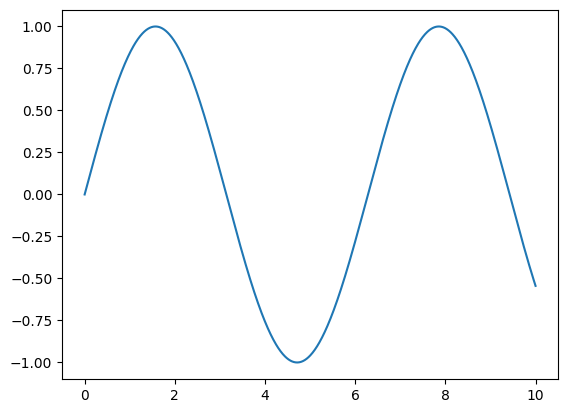

In [13]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))

### Installing *packages*

So far we have been able to import the various
packages via the `import` statement. But how were they installed?
? We must distinguish between two cases:

- a number of packages are part of the **library
standard**, which means they are installed at the same time as
`Python`. This is for example the case of the `random` package used more
high, but there are [many]
others](https://docs.python.org/fr/3/library/);

- other “third party” packages are developed by the community
`Python` users, and must be installed to be able to
be used. This is particularly the case for `numpy` and `pandas`. In
In our case, we did not have to install them because the environment
provided for training already contains all the packages
necessary to execute the different chapters.

Let's illustrate the package installation through the package
[emoji](https://pypi.org/project/emoji/), which allows you to represent
emoticons in `Python` output. This one is not
not yet installed; trying to import it produces a
`ModuleNotFoundError`.

In [14]:
import emoji

ModuleNotFoundError: No module named 'emoji'

To install a package, the command is simple:
`pip install package_name`. Without going into details, `pip` is
a package manager, installed with `Python`, which is used in
command line (i.e. in a terminal). To be able to send a
command to the terminal from a Jupyter notebook, we add a `!`
in front of the order.

In [15]:
!pip install emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   -- ------------------------------------- 30.7/590.6 kB ? eta -:--:--
   -- ------------------------------------- 30.7/590.6 kB ? eta -:--:--
   -- ------------------------------------- 30.7/590.6 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/590.6 kB 357.2 kB/s eta 0:00:02
   ------ -------------------------------- 92.2/590.6 kB 435.7 kB/s eta 0:00:02
   ------ -------------------------------- 92.2/590.6 kB 435.7 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/590.6 kB 400.9 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/590.6 kB 400.9 kB/s eta 0:00:02
   --------------- ---------------------- 235.5/590.6 kB 600.7 kB/s eta 0:00:01
   --------------- ---------------------- 235.5/590.6 kB 600.7 kB/s eta 0:00:01
   ------------------ ------------------- 286.7/590.6 kB 553.0 kB/s eta 0:00:01
   ------------------------- ------------ 389.1/590.6 kB 734.3 kB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rita_\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


It is now possible to import the package and use its
functions.

In [16]:
import emoji

print(emoji.emojize('Python est :thumbs_up:'))

Python est 👍


> **pip and PyPI**
> `pip` is the standard package manager for `Python`. It allows
> to install, update and remove `Python` packages
> found in the `Python` Package Index (`PyPI`), a repository of
> packages for programming in `Python`. This directory contains a
> huge number of projects (around 500,000 at the time of writing)
> of this tutorial), from the most amateur to the most essential.
> Generally speaking, it is always better, before starting
> in writing an application “by hand”, to verify that a
> package doing the same thing or almost does not already exist. A simple
> google search - preferably in English - containing the keywords
> of what we are trying to do often allows us to be sure of it.

## File Manipulation

### Interacting with the local file system

To be able to read and write files with `Python`, we need
First understand how these are represented on the system of
local files (*file system*), and how `Python` interacts with this
last.

**The `pathlib` module**

To do this, we will repeatedly use the module
`pathlib` and in particular the `Path` class. This module allows
to interact with the file system in the form of objects,
manipulating attributes and their methods. Don't panic, we have
given everything we needed to know about this in the previous one
tutorial.

In [17]:
from pathlib import Path

**File Properties**

A file has two properties:

- a **file name**

- a **path**, which specifies its location in the system
of files.

As an example, let's look at the files that are in our
current directory (by default, the folder in which this
The method to use is called `cwd`, ​​for *current working
directory*.

In [18]:
Path.cwd()

WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files')

The path to our current directory is contained in an object
`PosixPath`, which simply means that `pathlib` has figured out that we
were on a Unix-type environment (the SSP Cloud servers are
on Linux). If you were running this notebook locally on a computer
Windows, the object would be `WindowsPath`. In concrete terms, this does not change
big deal for you but it's actually quite important: the systems
files do not use the same conventions between different
environments (eg: separators between folders in a path do not
are not the same), but `pathlib` allows you to interact with these
different systems in a harmonized manner.

Now let's list all the files in our directory
current. For this we use a second `glob` method which will
simply return all files whose name has a certain
structure. For example, `.glob('*.txt')` will retrieve all files
whose extension is `.txt` and `.glob('test.*')` will retrieve all the
files with the name `test`, regardless of their extension. Here, we
recovers all files using *wildcards* `*` at both
positions.

This method returns a somewhat special object (a *generator*). If you
you remember well, we had already encountered the same case with the function
`range`. Just call the `list` function on the whole thing to
display the results in a readable manner.

In [19]:
Path.cwd().glob('*.*')

<generator object Path.glob at 0x00000213556BB780>

In [20]:
list(Path.cwd().glob('*.*'))

[WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/gamme.txt'),
 WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/normalisation.py'),
 WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/notes.txt'),
 WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/notes_clean.txt'),
 WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/tutorial.ipynb'),
 WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/tutorial_en.ipynb'),
 WindowsPath('c:/Users/rita_/OneDrive/Ambiente de Trabalho/phd-python/manipulation/modules-files/write_list.py')]

We find our notebook, a file that contains the solutions to the
tutorial exercises, and a number of text files that will
serve as examples in the rest of the tutorial. If we take the notebook
for example, we can clearly distinguish:

- its file name: `tutorial.ipynb`

- its path: `/home/onyxia/work/`

**Absolute paths and relative paths**

There are two possible ways to specify the path of a file:

- in an **absolute** way, the path then starts with the root (`/`
in Unix, `C:\` in Windows, etc.). The paths returned above
are therefore absolute.

- **relatively**, i.e. relative to the current directory of the
`Python` program. Since a path does not start with the
root, `pathlib` will consider it relative.

This distinction will prove to be quite important later, when he
will be about reading and writing files.

**Forming paths**

In practice, what interests us is being able to create our own
paths – whether absolute or relative to the current directory – in order
to specify where the files we want to read are located or
well where the files you want to write should be located.

`pathlib` offers a very intuitive syntax for building paths,
very similar to the string concatenation we
have already seen. Instead of a `+`, this time we will use a `/` to
concatenate the different parts of a path.

For example, let's try to reconstruct the full path of this notebook.
We can start by finding the path to the *home* directory, which is the
standard folder where all files are located
the user.

In [21]:
Path.home()

WindowsPath('C:/Users/rita_')

We can then concatenate the different subfolders and the name of
notebook file to get the full path to it.

In [22]:
path_nb = Path.home() / 'work' / 'tutorial.ipynb'
path_nb

WindowsPath('C:/Users/rita_/work/tutorial.ipynb')

We find exactly the same path as that obtained by listing
the files present in the current directory.

**More on `pathlib`**

We have only seen a glimpse of the tools offered by the `pathlib` module.
to interact with the local file system. The [documentation
official](https://docs.python.org/fr/3/library/pathlib.html) presents
exhaustively these possibilities. We will present in this
tutorial and in the following other methods from this
bookstore, as the opportunity arises. For the time being, we
know enough to read and write files on the system
files.

### Text files and binary files

In programming, we are generally led to manipulate two major
very different file families:

- **text files**. They only contain characters
standard textual – technically, which respect the standard
[Unicode](https://fr.wikipedia.org/wiki/Unicode) – without information
*formatting* (font, color, etc.). The *.txt* files or
again `Python` scripts ending in *.py* are examples of
text files. These files can be read with any
text editor.

- **binary files**. These are actually all other types of
files: compressed files (*.zip*, *tar.gz*, etc.), documents
PDFs, images, programs, etc. Open such a file with an editor
text usually produces a large sequence of characters
incomprehensible, because the textual representation is not suitable
to this data.

As you can imagine, these two file types are handled with
different tools. Furthermore, due to the diversity of
binary files, each of its files requires processing
particular. In a programming context, however, we are
mainly to manipulate code, which is textual data. We will
so only be interested in **writing and reading files
text** in this tutorial, but it is important to know how to recognize
binary data when it is required to be processed.

### Open a file

Asking `Python` to open a file is the same as opening a connection.
between the `Python` environment you are on and the file. As long as
that this connection is open, it is possible to manipulate the
file.

To open a file, we use the `open` function. For example, we will
open the file `gamme.txt` which was placed in the current directory.

In [23]:
path_gamme = Path.cwd() / 'gamme.txt'
file_in = open(path_gamme, 'r')
file_in

<_io.TextIOWrapper name='c:\\Users\\rita_\\OneDrive\\Ambiente de Trabalho\\phd-python\\manipulation\\modules-files\\gamme.txt' mode='r' encoding='cp1252'>

The `open` function returns an object of type `_io.TextIOWrapper`, which
specifies the file's **encoding mode** and **opening mode**.

Encoding and decoding are technical subjects, which we
will not cover in this tutorial. Let's just remember that the mode
default encoding is `UTF-8`, and there is never really a
good reason to choose another mode.

On the other hand, the **opening mode** is very important. There are three
Main modes:

- `r` : **read-only**. The file can only be read, but not
modified. This is the default mode when no mode is specified.

- `w`: **writing**. It is possible in this mode to write on a
file. **Warning: If a file with the same name already exists,
it will be automatically overwritten.**

- `a` : **appending**. This mode only allows you to add lines to
the end of an existing file.

Once the file is open, operations can be performed on it
file using methods attached to the object that represents it.
will see in the next section what the `readlines` method does.

In [24]:
file_in.readlines()

['do\n', 're\n', 'mi\n', 'fa\n', 'sol\n', 'la\n', 'si']

Once the manipulations are completed, we close the connection with the
`close` method. It is then no longer possible to manipulate the file.

In [25]:
file_in.close()

In practice, it is easy to forget to close the connection to a file,
which can create annoying errors. There is a syntax that allows
to avoid this problem by using a **context manager** which handles all
the connection for us.

In [26]:
with open(path_gamme, 'r') as file_in:
    lines = file_in.readlines()
    
lines

['do\n', 're\n', 'mi\n', 'fa\n', 'sol\n', 'la\n', 'si']

This syntax is much more readable: thanks to the indentation, we see
clearly the operations that are performed while the file is
open, and the latter is automatically closed as soon as one
returns to the initial indentation level. It is always preferable to use
this syntax if possible, it is good programming practice.

### Read a file

Once a file is opened, one may want to read its contents. There are
different ways to do it. A simple and elegant method is to
loop through the file, which is made possible
by the fact that the `Python` object representing the file is
**iterable**.

In [27]:
with open(path_gamme, 'r') as file_in:
    for line in file_in:
        print(line)

do

re

mi

fa

sol

la

si


In our example, we simply displayed the lines, but we
can do many things from the data present in the
text file: store them in a `Python` object, use them for
make calculations, keep only the lines that meet a
condition given via an `if` statement, etc.

There are also ready-made methods for reading the contents of a
file. The most basic is the `read` method, which returns the entire
of the file as a (potentially very long) string.

In [28]:
with open(path_gamme, 'r') as file_in:
    txt = file_in.read()
    
txt

'do\nre\nmi\nfa\nsol\nla\nsi'

This is rarely very useful: we generally prefer to recover
individually the lines of a file. The `readlines` method
iterates through the entire file, and returns a list whose elements are
the lines of the file, in the order of appearance.

In [29]:
with open(path_gamme, 'r') as file_in:
    l = file_in.readlines()
    
l

['do\n', 're\n', 'mi\n', 'fa\n', 'sol\n', 'la\n', 'si']

Note that each element of the list (except the last one) ends with
the special character `\n` (“line break”) which simply marks the
end of each line in a text file. This is the (hidden) presence of
this same character at the end of each call to the `print` function which
makes it so that you return to the line every time you use a
`print`.

### Write to a file

Writing to a file is very simple, it is done using
the `write` method. For example, let's write to a file line by line
the different elements contained in a list.

In [30]:
ex = ["ceci", "est", "un", "exemple", "très", "original"]

with open("test.txt", "w") as file_out:
    for elem in ex:
        file_out.write(elem)

Everything seems to have gone smoothly. We can verify that our
file has been successfully created via the `Jupyter` file explorer (on
left) or via the `ls` command in the terminal.

In [31]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


It is indeed there. Now let's check that its content is indeed what
we wanted.

In [32]:
with open("test.txt", "r") as file_out:
    print(file_out.read())

ceciestunexempletrèsoriginal


The different elements of our list have merged into a single block
of text! This is because, unlike the `print` function by
example, the `write` function does not automatically add the character
line break. You have to add it manually.

In [33]:
with open("test.txt", "w") as file_out:
    for elem in ex:
        file_out.write(elem + "\n")
        
with open("test.txt", "r") as file_out:
    print(file_out.read())

ceci
est
un
exemple
très
original



It's much better.

Some additional notes on writing files:

- better to repeat: **use the `\w` opening mode for a
file completely overwrites its contents**. When we rewrote our
file with line breaks, we completely overwrote the old one.

- why could we just put the file name in the function?
`open` and not a `Path` object including the full path to the
file you wanted to create? That's because `Python` has it
automatically interpreted as a **relative path** (to our
current directory) due to the absence of root.

- you can only write elements of type `str` in a file**
(string). If one of the elements in the above list
had been of type `int` or `float` for example, it would have been necessary
convert via the `str()` function before writing it to the file.
Otherwise, `Python` would have returned an error.

## Running code from `.py` files

So far in this tutorial we have explored the use of
packages/modules, whether they come from the standard library of
Python or are developed by third parties. We also discussed
interaction with the local file system. Now, let’s find out
how to combine these skills by writing and performing our own
Python scripts and modules as `.py` files.

### `Python` scripts

In a `Jupyter` notebook environment (like the one in which
you are located), the `Python` code is executed in a
**interactive**, cell by cell. This is possible because a *kernel*
(kernel) `Python` runs in the background throughout the
notebook usage session. However, outside of `Jupyter`, the
Code is usually written and executed as scripts. A script
`Python` is simply a text file with the extension `.py` and
which contains a series of `Python` instructions that will be executed
linearly by the `Python` interpreter.

The `write_list.py` file takes a code cell seen previously.
Let's display its contents.

In [34]:
with open('write_list.py', 'r') as script:
    print(script.read())

ex = ["ceci", "est", "un", "exemple", "trÃ¨s", "original"]

with open("output_script.txt", "w") as file_out:
    for elem in ex:
        file_out.write(elem)

print("SuccÃ¨s !")



A `Python` script is run in a terminal via the command
`python script_name.py`. To run it from a `Jupyter` notebook,
we add another `!` at the beginning of the line.

In [35]:
!python write_list.py

Succès !


The file `output_script.txt` has been successfully created locally (sometimes it is necessary
wait a bit or refresh for it to appear) and the message
expected was printed in the console output.

> **Notebook vs. scripts**
> Should we prefer the use of `Jupyter` notebooks, as in the
> within the framework of this training, or prefer execution via scripts
> ? There is no definitive answer to this question:
> - notebooks allow **interactive** execution, very
> convenient for experimentation;
> - scripts make it easier to automate a procedure,
> as long as they are executed linearly and without requiring
> intermediate actions on the part of the user.
> In short, notebooks are very useful during the phase of
> development, but we will prefer scripts as soon as it is
> question of automating treatments or producing code aimed at
> turn into production.

### Scripts and modules

As we have seen, a **script** is a `.py` file intended to be
executed directly. It usually contains a complete workflow
or an automated task. A **module** is also a `.py` file,
but which contains definitions of functions and/or classes
intended to be used by other scripts or modules. It is not
intended to be performed alone but imported elsewhere. At the beginning of this
tutorial, we used modules from packages written by
others. Now let's see how we can write our own modules
and import them according to the same principles.

Let's display the contents of the file `normalisation.py` which we will use
example.

In [ ]:
with open('normalisation.py', 'r') as module:
    print(module.read())

The function contained in this module can be imported as we
we saw in this tutorial. Note that the module itself must import
the packages/modules necessary for the proper functioning of the functions
that it contains (in this case, `numpy`).

To import a local module, use the `import` instruction followed
of the file name, without the extension. All functions defined in
the module can then be used via the syntax
`module_name.function_name`.

In [ ]:
import normalisation

x = [1, 2, 3, 4, 5]
x_norm = normalisation.normalise(x)

print(x_norm)

As explained at the beginning of the chapter, we could also import the
function directly so as not to have to recall the module name
which contains it. This is particularly useful if this function is required to
be used multiple times in the same notebook/script.

In [ ]:
from normalisation import normalise

x = [1, 2, 3, 4, 5]
x_norm = normalise(x)

print(x_norm)

> **The false good idea: import \***
> An essential good practice is to promote the readability of its
> code. In both import variants presented above, the code
> is readable: we can clearly see which module the function comes from
> used.
> On the other hand, it is not uncommon to see in Python code
> the instruction `from my_module import *`, which allows you to import all
> the functions defined in the file `my_module.py`. This is
> prohibit as far as possible for two reasons:
> - it becomes difficult to determine which module or package
> where the functions used come from;
> - if functions imported from different packages/modules
> have the same name, they can replace each other and generate errors
> painful to debug.
> In order to limit the length of the instruction line in case of import
> multiple functions, we can adopt the following syntax:


In [ ]:
from mon_module import (
     fonction1,
     fonction2,
     fonction3
 )


Finally, note that a `.py` file can serve as both a module and
as a script. To differentiate the two uses, we use the variable
`__name__`, which is defined by default by `Python` whenever we
uses a `.py` file:

- if the file is used as a **module** (eg:
`import my_file`), the variable `__name__` is the name of the file
(ex: `my_file`)

- if the file is used as a **script** (eg:
`python my_file.py`), the variable `__name__` is `__main__`

In the previous cell, the file `normalisation.py` was imported
as a module. In this case, the variable `__name__` is worth
`normalization` and that is why the code under the `if` condition does not have
was executed. When the file is executed as a script, this code is
executed.

In [ ]:
!python normalisation.py

It is therefore very common to come across the condition
`if __name__ == "__main__"` in `Python` scripts, which distinguishes
usage as a module and usage as a script.

## Exercises

### Comprehension questions

- 1/ What is a module?

- 2/ What is a package?

- 3/ Why is it not a good practice to import all the
functions of a module with the syntax `from module import *`

- 4/ What are the advantages of the `pathlib` library?

- 5/ What are the two properties of a file that allow
locate its position in the file system?

- 6/ What is the current directory?

- 7/ What are the two ways to specify a path? How
Does `Python` differentiate between the two?

- 8/ What are the two main families of files that we are
brought to manipulate in programming?

- 9/ What are the different ways to open a file?

- 10/ Why is it better to use syntax
`with open(...) as ...` to open a file?

- 11/ Why can we browse the lines of a file using
of a loop?

- 12/ What is the difference between a module and a script?

<details>

<summary>

Show solution

</summary>

- 1/ a **module** is a text file (with the extension .py for
mark the link to Python) containing a set of definitions
(of **classes**, of **functions**) and of instructions

- 2/ A package is a collection of modules.

- 3/ It overloads the memory if you only need a few
functions, and this reduces readability since we do not know
directly from which module comes which function.

- 4/ It allows you to interact with the file system with a
unified OOP syntax, regardless of the environment on which it is used
work.

- 5/ File name and path of the folder that contains the file.

- 6/ This is the directory in which the current Python session is
open. In a Jupyter notebook, this is by default the
folder that contains it.

- 7/ Absolute path (complete) and relative path (relative to the directory
An absolute path is recognizable because it always starts from the
root of the file system.

- 8/ Text files and binary files (anything that is not
text).

- 9/ r: reading. w: writing. a: appending

- 10/ This syntax involves a context manager, which manages the
file connection (opening and closing) for us.

- 11/ Because the object representing the file in Python is an iterable.

- 12/ As we have seen, a **script** is a `.py` file
intended to be executed directly. It usually contains a stream
complete work or an automated task. A **module** is
also a `.py` file, but which contains definitions of
functions and/or classes intended for use by others
scripts or modules. It is not intended to be run alone but
imported elsewhere.

</details>

### Mean and standard deviation of grades obtained on an exam

*Exercise inspired by:
[python.sdv.univ-paris-diderot.fr](https://python.sdv.univ-paris-diderot.fr/07_fichiers/)*

The text file `notes.txt` is located in your current directory. It
contains the marks obtained by 50 students in an exam. Problem: all
The notes were written on the same line, with a space on each
times. Open this file and calculate the mean and standard deviation of the
notes.

Clues:

- strings have a `split` method which allows
separate text by a given character

- it will be necessary to convert the notes to digital format in order to be able to
apply mathematical functions

- you can use functions from the `numpy` package to calculate
the requested statistics

In [6]:
# Test your answer in this cell
import numpy as np
from pathlib import Path

notes_file = Path.cwd() / 'notes.txt'
notes = open(notes_file, 'r')
read_notes = notes.readline()
all_notes = read_notes.split()
list_notes = [] #I have to create a new list, because I only have permission to read the file. That's why the strings were not beeing converted to integers.
for i in all_notes:
    list_notes.append(int(i))
mean_notes = np.average(list_notes)
standardDev_notes = np.std(list_notes)
notes.close()
print("The average note is " + str(mean_notes) + " and the standard deviation is " + str(standardDev_notes) + ".")

The average note is 9.0 and the standard deviation is 5.94306318324145.


<details>

<summary>

Show solution

</summary>

``` python
import numpy as np

with open("notes.txt", "r") as file_in:
    notes = file_in.read()

notes = notes.split()
notes_num = []
for n in notes:
    notes_num.append(int(n))

print(np.mean(notes_num))
print(np.std(notes_num))
```

</details>

### Admitted or rejected

*Exercise inspired by:
[python.sdv.univ-paris-diderot.fr](https://python.sdv.univ-paris-diderot.fr/07_fichiers/)*

The text file `notes_clean.txt` is located in your directory
current. It contains the marks obtained by 50 students in an exam.
Unlike the previous exercise, the grades this time are good
written: one note per line.

Write code that:

- stores each note in `int` format in a list

- rewrites the notes into a file `notes_mentions.txt` with on
each line notes it, followed by a space, followed by the mention
“Admitted” if the grade is greater than or equal to 10, and “Failed” otherwise.

For example, the first three lines of this new file should
be :

5 failed
5 failed
18 admitted

In [21]:
# Test your answer in this cell
import numpy as np
from pathlib import Path

notes_clean_file = Path.cwd() / 'notes_clean.txt'
open_notes_clean = open(notes_clean_file, 'r')
read_notes = open_notes_clean.readlines()
#Creating a list which stores each note in int format.
list_notes = []
#print(read_notes)
for i in read_notes:
    #print("##"+i)
    i_stripped = i.strip()
    #print("##"+i_stripped)
    list_notes.append(int(i_stripped))
#Creating the new file, where the admission information will be included, depending on the notes.
notes_admission = Path.cwd() / 'notes_mentions.txt'
with open(notes_admission, "w") as file:
    for i in list_notes:
        if i >= 10:
            file.write(str(i) + " " + "Admitted" + "\n")
        else:
            file.write(str(i) + " " + "Failed" + "\n")
#Closing the initial file
open_notes_clean.close()

['5\n', '5\n', '18\n', '1\n', '13\n', '17\n', '2\n', '6\n', '18\n', '5\n', '6\n', '11\n', '1\n', '9\n', '3\n', '12\n', '2\n', '9\n', '9\n', '18\n', '1\n', '13\n', '1\n', '9\n', '9\n', '7\n', '4\n', '18\n', '15\n', '12\n', '16\n', '14\n', '13\n', '16\n', '6\n', '11\n', '9\n', '1\n', '17\n', '18\n', '3\n', '2\n', '19\n', '5\n', '0\n', '11\n', '4\n', '16\n', '10\n', '0\n']


<details>

<summary>

Show solution

</summary>

``` python
notes = []

with open("notes_clean.txt", "r") as file_in:
    for n in file_in:
        notes.append(int(n))
        
with open("notes_mentions.txt", "w") as file_out:
    for n in notes:
        if n >= 10:
            mention = "admis"
        else:
            mention = "recalé"
        file_out.write(str(n) + " " + mention + "\n")
```

</details>

### Latecomers

3 students did not submit their papers on time for the exam:

- Miranda got 16 and handed in her assignment 3 days late.

- Paolo got 11 and handed in his homework 1 day late

- Isidore got a 3 and handed in his homework 5 days late.

Each student will have a final grade equal to the grade obtained minus the
number of days late. A rating cannot be negative, it will be
replaced by 0.

The necessary information has been placed in a list in the
next cell. Using a loop over this list, **add**
(without completely rewriting the file!). notes to the file
`notes_clean.txt` (without the mention).

NB: If you have overwritten the contents of a file by mistake, you can
find the clean files on the [GitHub repository associated with the
formation](https://github.com/InseeFrLab/formation-python-initiation/tree/main/source/manipulation/modules-files).

In [22]:
supp = [(16, 3), (11, 1), (3, 5)]

In [36]:
# Test your answer in this cell
final_grades = []
for i in supp:
    final_grades.append(i[0] - i[1]) #Calculating the final grades of Miranda, Paolo and Isidore.
with open(Path.cwd() / "notes_clean.txt", "a") as file: #Opening the file to which we want to append information.
    for i, n in enumerate(final_grades):
        if n < 0:
            final_grades[i] = 0 #Changing the negative values to zero.
    #print(final_grades)
        file.write(str(final_grades[i]) + "\n") #Appending information to the already existing file.





<details>

<summary>

Show solution

</summary>

``` python
supp = [(16, 3), (11, 1), (3, 5)]

with open("notes_clean.txt", "a") as file_out:
    for elem in supp:
        note_finale = elem[0] - elem[1]
        note_finale = max(0, note_finale)
        file_out.write(str(note_finale) + "\n")
```

</details>

### Scan files

Write a program that performs the following operations:

- in the current directory, list the paths of the files whose
the extension is `.txt` (the syntax was seen in the part on
`pathlib`)

- make a loop that goes through these paths and opens each file
sequentially

- for each file, do a membership test (reminder of the
syntax: `if pattern in string: ...`) to test if the file
contains the word “sol”. If so, print its absolute path
in the console (only the path of the file `gamme.txt` should therefore
appear)

In [40]:
# Test your answer in this cell
from pathlib import Path

current_directory = Path.cwd()
list_of_text_files = list(current_directory.glob('*.txt'))
#print(list_of_text_files)
for i in list_of_text_files:
    file_open = open(i, 'r')
    if "sol" in file_open.read():
        print(i)



c:\Users\rita_\OneDrive\Ambiente de Trabalho\phd-python\manipulation\modules-files\gamme.txt


<details>

<summary>

Show solution

</summary>

``` python
from pathlib import Path

txt_files_paths = list(Path.cwd().glob('*.txt'))

for path in txt_files_paths:
    with open(path, "r") as file_in:
        content = file_in.read()
        if "sol" in content:
            print(path)
```

</details>